In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from glob import glob
import os 
import matplotlib.pyplot as plt 
%matplotlib inline


In [11]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#resize the images
img_width= 64
img_height = 64
folder = glob('./Dataset/Train/*')

In [3]:
train= '/Dataset/Train/'
test = '/Dataset/Test/'

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)       

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

train_datagen = datagen.flow_from_directory('./Dataset/Train/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:
test_set = datagen.flow_from_directory('./Dataset/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 132 images belonging to 2 classes.


In [17]:
history = model.fit_generator(generator= train_datagen, 
                   steps_per_epoch=len(train_datagen),
                   epochs = 10,
                   validation_data= test_set,
                   validation_steps=len(test_set)) 

Epoch 1/10
13/13 [==============================] - 13s 931ms/step - loss: 2.9017 - accuracy: 0.4952 - val_loss: 0.6809 - val_accuracy: 0.5909
Epoch 2/10
13/13 [==============================] - 11s 826ms/step - loss: 0.7647 - accuracy: 0.5024 - val_loss: 0.6904 - val_accuracy: 0.6667
Epoch 3/10
13/13 [==============================] - 10s 806ms/step - loss: 0.6840 - accuracy: 0.5577 - val_loss: 0.6850 - val_accuracy: 0.6742
Epoch 4/10
13/13 [==============================] - 10s 741ms/step - loss: 0.6715 - accuracy: 0.5889 - val_loss: 0.6856 - val_accuracy: 0.6742
Epoch 5/10
13/13 [==============================] - 10s 794ms/step - loss: 0.6448 - accuracy: 0.6562 - val_loss: 0.7292 - val_accuracy: 0.3485
Epoch 6/10
13/13 [==============================] - 11s 842ms/step - loss: 0.6121 - accuracy: 0.6827 - val_loss: 0.7005 - val_accuracy: 0.4773
Epoch 7/10
13/13 [==============================] - 11s 819ms/step - loss: 0.5624 - accuracy: 0.7260 - val_loss: 0.6947 - val_accuracy: 0.4924

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


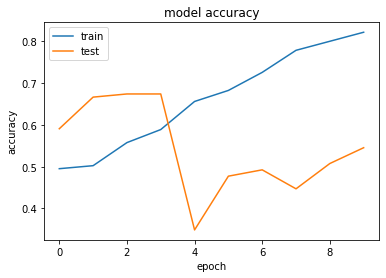

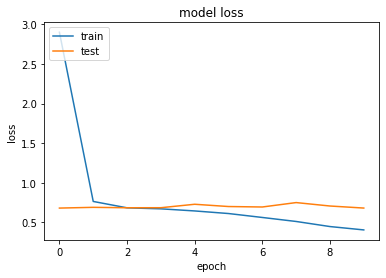

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()